<h1>Quiz 1 : Pemahaman</h1>

1. Sebutkan apa saja kira2 preprocessing Data?
2. Jelaskan beberapa cara imputing missing value?
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

1. Berikut preprocessing data:
- Binarization
- Mean Removal
- Scaling
- Normalization
- Label encoding

2. Berikut beberapa cara dalam menghandle missing value:
- Drop missing value yaitu ketika jumlah missing value data banyak atau NaN maka baris atau kolom tersebut dihapuskan
- Filling with mean/median yaitu berlaku untuk data yang bertipe numerik sehingga dirata-ratakan menjadi float dan kemudian diubah kedalam bentuk integer
- Filling with modus yaitu berlaku untuk data yang bertipe kategori dengan mengambil data yang paling banyak dari kategori tersebut untuk diisikan ke nilai NaN
- Filling with bfill (backward fill) atau ffill (forward fill) yaitu data NaN diisi dengan data sebelumnya atau data setelahnya
- KNN yaitu cara menghandle missing value dengan algoritma KNN berdasarkan data tetangganya yang terdekat

3. Ketika suatu kolom prediktor memiliki skala distribusi yang besar maka akan mempengaruhi pembangunan terhadap suatu model dan ketika skala distribusinya kecil maka pengaruhnya juga kecil terhadap arsitektur pembuatan suatu model, sehingga skala yang diperlukan harus disesuaikan agar seimbang.

4. Data science workflow yaitu
- Mengambil data dari sumber data
- Data tersebut kemudian diproses untuk dianalisis
- Analisis tersebut dibuat sebuah model
- Jika model tersebut sudah selesai maka akan diproduction
- Terakhir model tersebut akan dimonitoring

<h1>Quiz 2 : Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data titanic.csv sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data titanic_test.csv untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![image.png](attachment:image.png)

In [0]:
# Read titanic.csv
import pandas as pd

df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
# EDA - Columns titanic.csv
# ============================
# PassengerId : int	(Clean)
# Survived : int (Clean)
# Pclass : int (Clean)
# Name : string (Not Clean, karena data berupa string unique)	
# Sex : string (Not Clean, karena termasuk data kategori dan dapat diubah ke numerik)
# Age : float (Not Clean, karena ada missing value)
#	SibSp : int (Clean)
# Parch : int (Clean)
# Ticket : string (Clean, karena data berupa string unique)
# Fare : float (Clean)
# Cabin : (Not Clean, karena ada missing value)
# Embarked : (Not Clean, karena termasuk data kategori dan dapat diubah ke numerik dan ada missing value)

# Solusi saya terkait data Not Clean yang termasuk kategori maka diubah ke numerik, sementara data Not Clean bagian missing value 
# saya antisipasi dengan algoritma KNN karena kolom Age, Cabin, Embarked kemungkinan besar saling berkaitan antar data yang lain 

In [0]:
# Menghapus kolom Name dan Ticket karena bersifat unique dan dapat diwakili oleh kolom PassengerId  
df = df.drop(['Name', 'Ticket'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [0]:
# Encoding Categorical Data Kolom Sex dan Embarked
obj_sex = {
  'male' : 0,
  'female' : 1
}

obj_embarked = {
    'C' : 0,
    'Q' : 1,
    'S' : 2
}

df['Sex'] = df['Sex'].replace(obj_sex)
df['Embarked'] = df['Embarked'].replace(obj_embarked)

In [0]:
# Encoding kolom cabin menjadi float
import numpy as np

df['Cabin'] = df['Cabin'].replace(np.nan, '0')
key_cabin = df['Cabin'].unique()
key_cabin.sort()
value_cabin = np.arange(0, len(df['Cabin'].unique()))
obj_cabin = dict(zip(key_cabin, value_cabin.T))
df['Cabin'] = df['Cabin'].replace(obj_cabin)
df['Cabin'] = df['Cabin'].replace(0, np.nan)

In [0]:
# Missing value kolom Age, Cabin, dan Embarked
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=5)
df[['Age', 'Cabin', 'Embarked']] = imp.fit_transform(df[['Age', 'Cabin', 'Embarked']])
# Value NaN sudah terisi
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,55.4,2.0
1,2,1,1,1,38.0,1,0,71.2833,82.0,0.0
2,3,1,3,1,26.0,0,0,7.9250,47.6,2.0
3,4,1,1,1,35.0,1,0,53.1000,56.0,2.0
4,5,0,3,0,35.0,0,0,8.0500,51.0,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,40.4,2.0
887,888,1,1,1,19.0,0,0,30.0000,31.0,2.0
888,889,0,3,1,31.4,1,2,23.4500,97.6,2.0
889,890,1,1,0,26.0,0,0,30.0000,61.0,0.0


In [0]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

X = df.drop('Survived', axis=1)
y = df['Survived']

In [0]:
from sklearn.preprocessing import StandardScaler

stdscalar = StandardScaler()
datascale = stdscalar.fit_transform(X)
X = pd.DataFrame(datascale, columns=X.columns)
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,-1.730108,0.827377,-0.737695,-0.566204,0.432793,-0.473674,-0.502445,-0.695446,0.585954
1,-1.726220,-1.566107,1.355574,0.652260,0.432793,-0.473674,0.786845,0.332435,-1.942303
2,-1.722332,0.827377,1.355574,-0.261588,-0.474545,-0.473674,-0.488854,-0.996854,0.585954
3,-1.718444,-1.566107,1.355574,0.423798,0.432793,-0.473674,0.420730,-0.672260,0.585954
4,-1.714556,0.827377,-0.737695,0.423798,-0.474545,-0.473674,-0.486337,-0.865471,0.585954
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.737695,-0.185434,-0.474545,-0.473674,-0.386671,-1.275078,0.585954
887,1.718444,-1.566107,1.355574,-0.794665,-0.474545,-0.473674,-0.044381,-1.638314,0.585954
888,1.722332,0.827377,1.355574,0.149644,0.432793,2.008933,-0.176263,0.935253,0.585954
889,1.726220,-1.566107,-0.737695,-0.261588,-0.474545,-0.473674,-0.044381,-0.479050,-1.942303


In [0]:
X.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.517004e-17,-2.031048e-16,3.162453e-16,-5.423396e-17,3.456519e-16,6.716164e-17,-4.373606e-17,-1.672188e-16,1.556306e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-1.566107e+00,-7.376951e-01,-2.209606e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-2.797578e+00,-1.942303e+00
25%,-8.650540e-01,-3.693648e-01,-7.376951e-01,-5.662036e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-6.258899e-01,-6.781745e-01
50%,0.000000e+00,8.273772e-01,-7.376951e-01,-3.312570e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01,-4.625781e-02,5.859541e-01
75%,8.650540e-01,8.273772e-01,1.355574e+00,4.237982e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,7.922766e-01,5.859541e-01
max,1.730108e+00,8.273772e-01,1.355574e+00,3.850727e+00,6.784163e+00,6.974147e+00,9.667167e+00,2.844174e+00,5.859541e-01


In [0]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.434983,0.523008,0.381594,32.204208,73.397082,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.138665,1.102743,0.806057,49.693429,25.893018,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,57.200000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,72.200000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,93.900000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,2.000000


In [0]:
def knn_predict(k):
  model = KNeighborsClassifier(n_neighbors=k)
  score = cross_validate(model, X, y, cv=10, return_train_score=True)
  train_score = score['train_score'].mean()
  test_score = score['test_score'].mean()
  return train_score, test_score

In [0]:
train_scores = []
test_scores = []

for k in range(2, 100):
  train_score, test_score = knn_predict(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

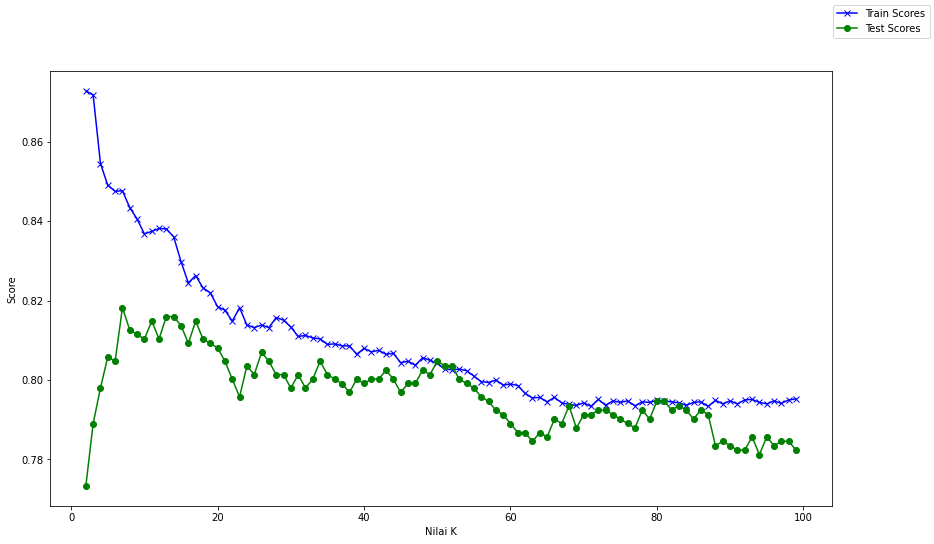

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(range(2, 100), train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2, 100), test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Score')

fig.legend()
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(5, 50), 'weights':['distance', 'uniform']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
gscv.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [0]:
gscv.best_score_

0.8215366267026551

In [0]:
# Read titanic_test.csv
df_test = pd.read_csv('titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
df_test = df_test.drop(['Name', 'Ticket'], axis=1)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,NaN,S
414,1306,1,female,39.0,0,0,108.9000,C105,C
415,1307,3,male,38.5,0,0,7.2500,NaN,S
416,1308,3,male,NaN,0,0,8.0500,NaN,S


In [0]:
df_test['Sex'] = df_test['Sex'].replace(obj_sex)
df_test['Embarked'] = df_test['Embarked'].replace(obj_embarked)

In [0]:
df_test['Cabin'] = df_test['Cabin'].replace(np.nan, '0')
key_cabin_test = df_test['Cabin'].unique()
key_cabin_test.sort()
value_cabin_test = np.arange(0, len(df_test['Cabin'].unique()))
obj_cabin_test = dict(zip(key_cabin_test, value_cabin_test.T))
df_test['Cabin'] = df_test['Cabin'].replace(obj_cabin_test)
df_test['Cabin'] = df_test['Cabin'].replace(0, np.nan)

In [0]:
# Missing Value terisi
df_test[['Age', 'Fare', 'Cabin', 'Embarked']] = imp.fit_transform(df_test[['Age', 'Fare', 'Cabin', 'Embarked']])

In [0]:
# Scaling
datascale_test = stdscalar.fit_transform(df_test)
X_test = pd.DataFrame(datascale_test, columns=df_test.columns)

In [0]:
# Prediksi
y_pred = gscv.predict(X_test)
df_test['Survived'] = y_pred
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,66.8,1.0,0
1,893,3,1,47.0,1,0,7.0000,50.8,2.0,0
2,894,2,0,62.0,0,0,9.6875,33.0,1.0,0
3,895,3,0,27.0,0,0,8.6625,72.0,2.0,0
4,896,3,1,22.0,1,1,12.2875,64.4,2.0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.7,0,0,8.0500,71.2,2.0,0
414,1306,1,1,39.0,0,0,108.9000,23.0,0.0,1
415,1307,3,0,38.5,0,0,7.2500,55.2,2.0,0
416,1308,3,0,30.7,0,0,8.0500,71.2,2.0,0


In [0]:
df_test = df_test.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], axis=1)
df_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
df_test['Survived'].value_counts()

0    295
1    123
Name: Survived, dtype: int64

In [0]:
df_test.to_csv("titanic_test_mazharrasyad.csv", index=False)

In [0]:
# Pembahasan Tugas Harian 5
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('titanic.csv')
test = pd.read_csv('titanic_test.csv')

train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).dropna()
x = train.drop('Survived', axis=1)
y = train['Survived']

x = pd.get_dummies(x)
x = pd.DataFrame(StandardScaler().fit_transform(x), columns=list(x.columns.values))

In [0]:
test = test.drop('Cabin', axis=1).dropna()
x_test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
x_test = pd.get_dummies(x_test)
x_test = pd.DataFrame(StandardScaler().fit_transform(x_test), columns=list(x_test.columns.values))

In [0]:
model = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1, 50), 'metric':['euclidean','manhattan','minkowski'], 'weights':['distance', 'uniform']}
gscv = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
gscv.fit(x, y.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
print(gscv.best_params_)
print(gscv.best_score_)

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.8019797104304146


In [0]:
model = KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='uniform')
model.fit(x,y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [0]:
test['Survived'] = y_pred
test.Survived.value_counts()

0    211
1    120
Name: Survived, dtype: int64

In [0]:
test[['PassengerId', 'Survived']].to_csv('titanic_test-2.csv', index=False)